1. Data Loading and Exploration

In [42]:
import pandas as pd



# Load the dataset

data = pd.read_csv('/kaggle/input/train-dataset/annual_metropolitan_train_station_entries_fy_2023_2024.csv')



# Display the first few rows

print(data.head())



# Dataset info and summary statistics

print(data.info())

print(data.describe())

  Fin_year  Stop_ID   Stop_name   Stop_lat   Stop_long  Pax_annual  \
0  FY23-24    19829    Morradoo -38.354033  145.189603        3600   
1  FY23-24    19831    Hastings -38.305659  145.185980       14300   
2  FY23-24    19832       Tyabb -38.259815  145.186401        3250   
3  FY23-24    19833  Somerville -38.225342  145.176245        7400   
4  FY23-24    19835   Glen Iris -37.859308  145.058225      268850   

   Pax_weekday  Pax_norm_weekday  Pax_sch_hol_weekday  Pax_Saturday  \
0           50                50                   50            50   
1           50                50                   50            50   
2           50                50                   50            50   
3           50                50                   50            50   
4          850               900                  650           550   

   Pax_Sunday  Pax_pre_AM_peak  Pax_AM_peak  Pax_interpeak  Pax_PM_peak  \
0          50               50           50             50           50   
1 

2. Data Cleaning

In [43]:
# Check for missing values

print(data.isnull().sum())



# Convert columns to appropriate data types if needed

data['Stop_ID'] = data['Stop_ID'].astype(int)

Fin_year               0
Stop_ID                0
Stop_name              0
Stop_lat               0
Stop_long              0
Pax_annual             0
Pax_weekday            0
Pax_norm_weekday       0
Pax_sch_hol_weekday    0
Pax_Saturday           0
Pax_Sunday             0
Pax_pre_AM_peak        0
Pax_AM_peak            0
Pax_interpeak          0
Pax_PM_peak            0
Pax_PM_late            0
dtype: int64


3. Exploratory Data Analysis (EDA)

In [44]:
earthy_palette = ['#8B4513', '#A0522D', '#CD853F', '#DEB887', '#D2691E', '#556B2F', '#6B8E23', '#808000', '#8FBC8F']

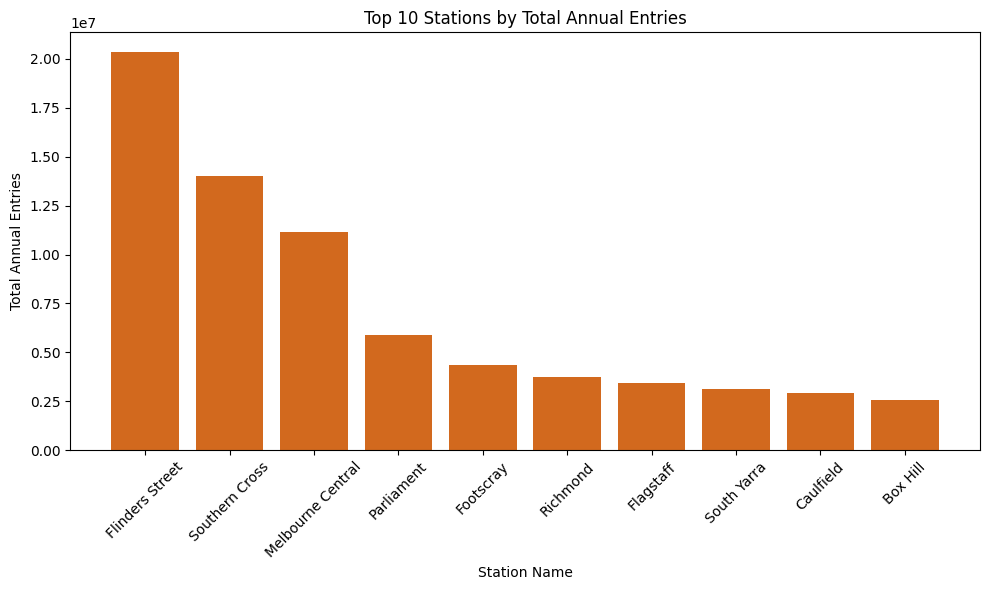

In [45]:
import matplotlib.pyplot as plt



# Top 10 busiest stations

top_10_stations = data.nlargest(10, 'Pax_annual')



plt.figure(figsize=(10, 6))

plt.bar(top_10_stations['Stop_name'], top_10_stations['Pax_annual'], color='#D2691E')

plt.title('Top 10 Stations by Total Annual Entries')

plt.xlabel('Station Name')

plt.ylabel('Total Annual Entries')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

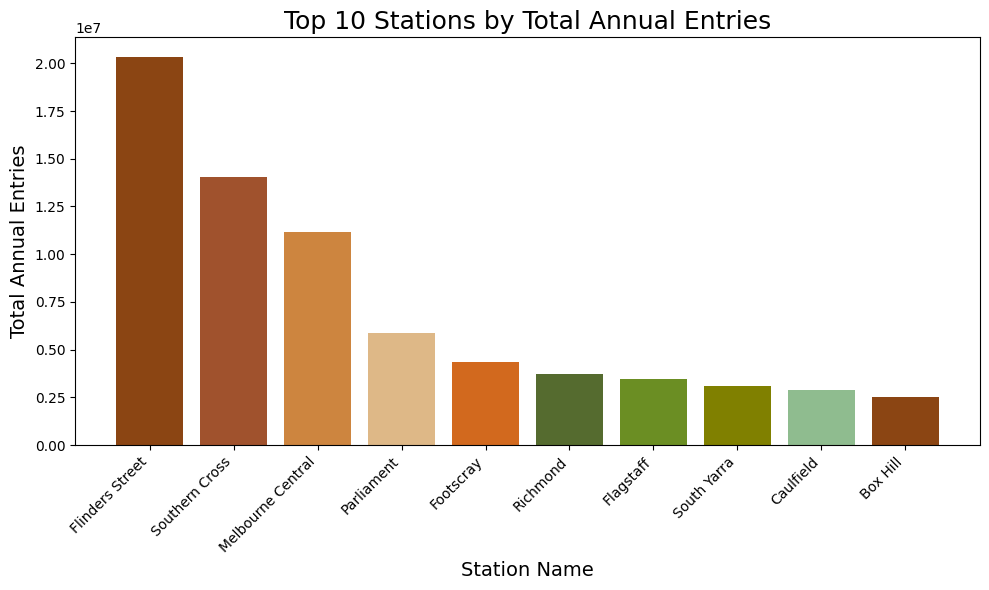

In [46]:
plt.figure(figsize=(10, 6))

plt.bar(top_10_stations['Stop_name'], top_10_stations['Pax_annual'], color=earthy_palette)

plt.title('Top 10 Stations by Total Annual Entries', fontsize=18)

plt.xlabel('Station Name', fontsize=14)

plt.ylabel('Total Annual Entries', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

Average Entries by Day of the Week:

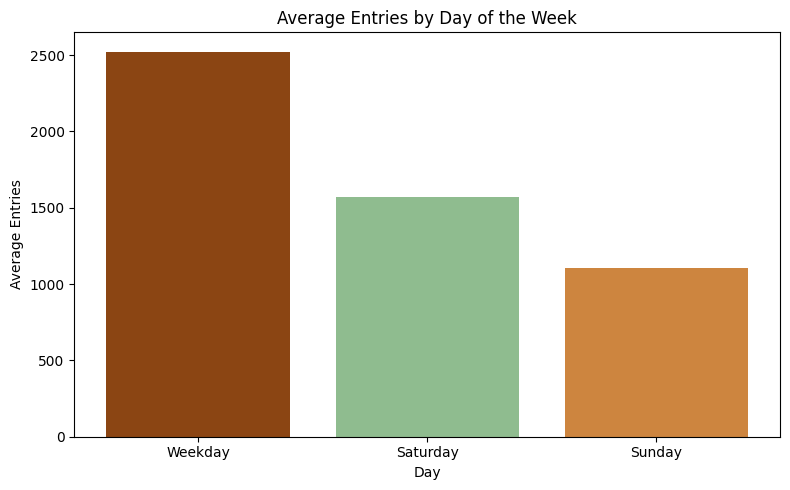

In [47]:
average_entries = [data['Pax_weekday'].mean(), data['Pax_Saturday'].mean(), data['Pax_Sunday'].mean()]

days = ['Weekday', 'Saturday', 'Sunday']



plt.figure(figsize=(8, 5))

plt.bar(days, average_entries, color=['#8B4513', '#8FBC8F', '#CD853F'])

plt.title('Average Entries by Day of the Week')

plt.xlabel('Day')

plt.ylabel('Average Entries')

plt.tight_layout()

plt.show()

4. Geospatial Analysis

In [48]:
import folium



melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)



for _, row in data.iterrows():

    folium.CircleMarker(

        location=[row['Stop_lat'], row['Stop_long']],

        radius=5,

        popup=f"{row['Stop_name']} - {row['Pax_annual']} entries",

        color=earthy_palette[_ % len(earthy_palette)],

        fill=True,

        fill_color=earthy_palette[_ % len(earthy_palette)]

    ).add_to(melbourne_map)



melbourne_map

In [53]:
melbourne_map.save("melbourne_map.html")

5. Time-Based Analysis

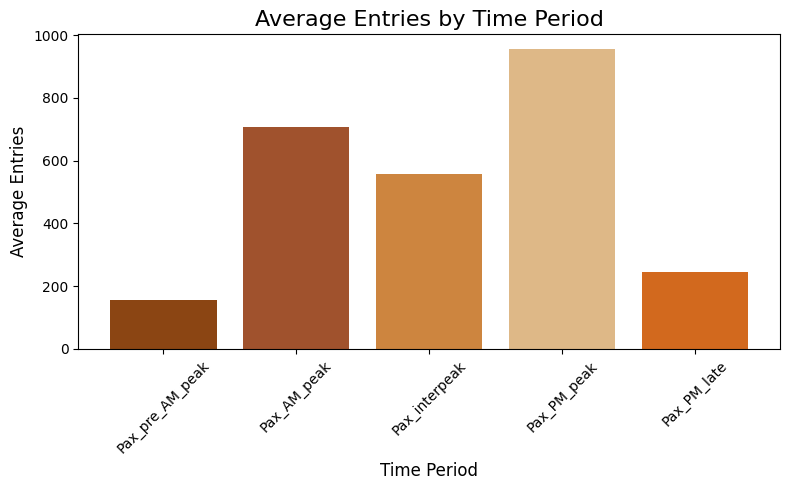

In [49]:
time_periods = ['Pax_pre_AM_peak', 'Pax_AM_peak', 'Pax_interpeak', 'Pax_PM_peak', 'Pax_PM_late']

average_time_entries = [data[period].mean() for period in time_periods]



plt.figure(figsize=(8, 5))

plt.bar(time_periods, average_time_entries, color=earthy_palette)

plt.title('Average Entries by Time Period', fontsize=16)

plt.xlabel('Time Period', fontsize=12)

plt.ylabel('Average Entries', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

6. Machine Learning Prediction

In [50]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error



# Select features and target variable

features = ['Stop_lat', 'Stop_long', 'Pax_weekday', 'Pax_Saturday', 'Pax_Sunday']

target = 'Pax_annual'



X = data[features]

y = data[target]



# Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train a linear regression model

model = LinearRegression()

model.fit(X_train, y_train)



# Make predictions and evaluate performance

y_pred = model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

Mean Squared Error: 28055524.451816346


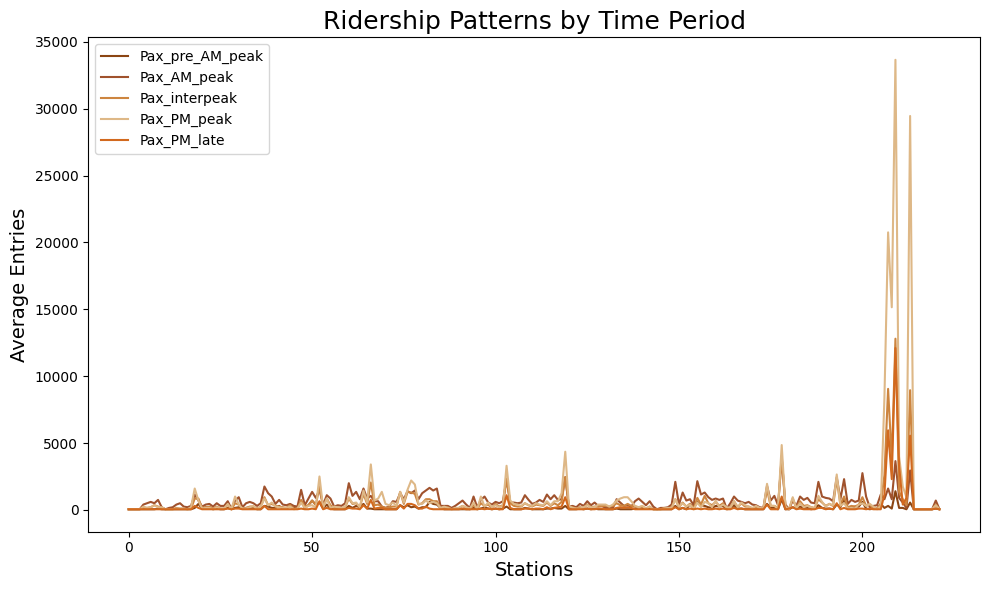

In [51]:
plt.figure(figsize=(10, 6))

for i, period in enumerate(time_periods):

    plt.plot(data[period], color=earthy_palette[i % len(earthy_palette)], label=period)

plt.title('Ridership Patterns by Time Period', fontsize=18)

plt.xlabel('Stations', fontsize=14)

plt.ylabel('Average Entries', fontsize=14)

plt.legend()

plt.tight_layout()

plt.show()